

**1. Scrape Twitter Data for  Tweets**

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 2.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

from wordcloud import ImageColorGenerator

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 10000 --since 2023-03-13 twitter-search 'netflix' > text-switch-tweets.json")

0

In [ ]:
import pandas as pd

# creates a pandas dataframe
tweets_df_switch = pd.read_json('text-switch-tweets.json', lines=True)


In [ ]:
tweets_df_switch.head()


,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/skjzuu/status/164061089292...,2023-03-28 07:04:52+00:00,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,1640610892927647746,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,NaN,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,[http://wa.me/6281522624854],http://wa.me/6281522624854,[https://t.co/SlonSpMZhF],https://t.co/SlonSpMZhF,skjzuu
1,snscrape.modules.twitter.Tweet,https://twitter.com/emogf420/status/1640610876...,2023-03-28 07:04:48+00:00,it has to be some sort of ip tracking because ...,it has to be some sort of ip tracking because ...,1640610876465074176,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,NaN,it has to be some sort of ip tracking because ...,[],,[],,emogf420
2,snscrape.modules.twitter.Tweet,https://twitter.com/WooriMro/status/1640610869...,2023-03-28 07:04:46+00:00,"@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","@Jiminssshiii_ Moi aussi, j’ai commencé au moi...",1640610869225705472,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,NaN,"@Jiminssshiii_ Moi aussi, j’ai commencé au moi...",[],,[],,WooriMro
3,snscrape.modules.twitter.Tweet,https://twitter.com/_Vandalio/status/164061086...,2023-03-28 07:04:46+00:00,"Por cierto, me quedan días con Netflix operati...","Por cierto, me quedan días con Netflix operati...",1640610866717442049,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,NaN,"Por cierto, me quedan días con Netflix operati...",[],,[],,_Vandalio
4,snscrape.modules.twitter.Tweet,https://twitter.com/zispremier/status/16406108...,2023-03-28 07:04:44+00:00,jual netflix wetv https://t.co/yUhw12OLWF,jual netflix wetv https://t.co/yUhw12OLWF,1640610858568138752,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,NaN,NaN,jual netflix wetv https://t.co/yUhw12OLWF,[],,[],,zispremier


**2. Data Loading**

In [ ]:
df_switch = tweets_df_switch[['date', 'rawContent','renderedContent','user','replyCount','retweetCount','likeCount','lang','place','hashtags','viewCount']].copy()

In [ ]:
print(df_switch.shape)

(10000, 11)


**3. Twitter Data Cleaning , Preprocessing and Exploratory Data Analysis**

In [ ]:
df2=df_switch.drop_duplicates('renderedContent')

In [ ]:
print(df2.shape)

(9547, 11)


In [ ]:
df2.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount
0,2023-03-28 07:04:52+00:00,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,in,None,None,NaN
1,2023-03-28 07:04:48+00:00,it has to be some sort of ip tracking because ...,it has to be some sort of ip tracking because ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,NaN
2,2023-03-28 07:04:46+00:00,"@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,fr,None,None,NaN
3,2023-03-28 07:04:46+00:00,"Por cierto, me quedan días con Netflix operati...","Por cierto, me quedan días con Netflix operati...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,es,None,None,NaN
4,2023-03-28 07:04:44+00:00,jual netflix wetv https://t.co/yUhw12OLWF,jual netflix wetv https://t.co/yUhw12OLWF,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,de,None,None,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9547 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             9547 non-null   datetime64[ns, UTC]
 1   rawContent       9547 non-null   object             
 2   renderedContent  9547 non-null   object             
 3   user             9547 non-null   object             
 4   replyCount       9547 non-null   int64              
 5   retweetCount     9547 non-null   int64              
 6   likeCount        9547 non-null   int64              
 7   lang             9547 non-null   object             
 8   place            150 non-null    object             
 9   hashtags         1783 non-null   object             
 10  viewCount        9526 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 895.0+ KB


In [ ]:
df2.date.value_counts()

2023-03-28 02:00:00+00:00    7
2023-03-28 01:00:01+00:00    5
2023-03-28 01:43:58+00:00    5
2023-03-28 03:30:00+00:00    5
2023-03-28 02:00:03+00:00    5
                            ..
2023-03-28 04:20:20+00:00    1
2023-03-28 04:20:24+00:00    1
2023-03-28 04:20:37+00:00    1
2023-03-28 04:20:42+00:00    1
2023-03-28 03:25:44+00:00    1
Name: date, Length: 7864, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

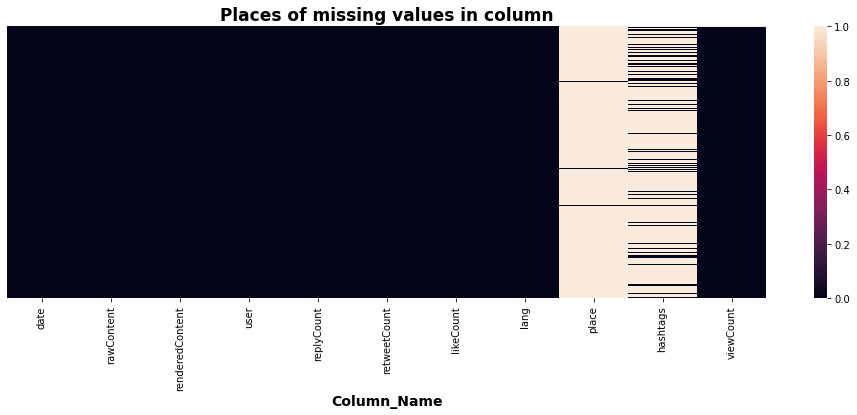

In [ ]:
#Heat Map for missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df2.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df2['place'].value_counts().head(10)

In [ ]:
print (Top_Location_Of_tweet)

{'_type': 'snscrape.modules.twitter.Place', 'id': '97bcdfca1a2dca59', 'fullName': 'Rio de Janeiro, Brazil', 'name': 'Rio de Janeiro', 'type': 'city', 'country': 'Brazil', 'countryCode': 'BR'}    6
{'_type': 'snscrape.modules.twitter.Place', 'id': '27fbd5412c269208', 'fullName': 'Huntersville, NC', 'name': 'Huntersville', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}     4
{'_type': 'snscrape.modules.twitter.Place', 'id': '3b77caf94bfc81fe', 'fullName': 'Los Angeles, CA', 'name': 'Los Angeles', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}       4
{'_type': 'snscrape.modules.twitter.Place', 'id': 'dee4362fa7f11785', 'fullName': 'Kodaira-shi, Tokyo', 'name': 'Kodaira-shi', 'type': 'city', 'country': 'Japan', 'countryCode': 'JP'}            2
{'_type': 'snscrape.modules.twitter.Place', 'id': '00e55e2b4c491c5f', 'fullName': 'Abuja, Nigeria', 'name': 'Abuja', 'type': 'city', 'country': 'Nigeria', 'countryCode': 'NG'}                    2
{'_type': 'snsc

In [ ]:
import nltk

In [ ]:
stop=nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

**Twitter Data Cleaning and Preprocessing**

In [ ]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)
  
    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df2['processed_text'] = df2['renderedContent'].apply(pre_process)

<ipython-input-22-51b7294900ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['processed_text'] = df2['renderedContent'].apply(pre_process)




---



In [ ]:
print(df2['processed_text'].head())

0    ready netflix sharing 38k/bln 13k/minggu vidio...
1    it has to be some sort of ip tracking because ...
2     moi aussi, j’ai commencé au moins 5 drama sur...
3    por cierto, me quedan días con netflix operati...
4                                   jual netflix wetv 
Name: processed_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(df2['processed_text'], 20)

In [ ]:
print(common_words)

[('ตฟล กซ', 753), ('กซ ราคาถ', 367), ('en netflix', 327), ('พร อมส', 294), ('จอส วนต', 277), ('lin ee', 265), ('night agent', 257), ('na netflix', 243), ('premium account', 201), ('กซ ตฟล', 196), ('netflix spotify', 196), ('available premium', 186), ('microsoft 365', 186), ('quizlet plus', 184), ('disney ph', 180), ('quillbot turnitin', 179), ('picsart gold', 179), ('agent netflix', 178), ('pro quillbot', 177), ('scribd grammarly', 177)]


In [ ]:
df3 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
#df3.groupby('TweetText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count',linecolor='black',title='Top 20 bigrams in Tweet before removing spams')

## **4. Sentiment Analysis**

In [ ]:
df3.head()

,TweetText,count
0,ตฟล กซ,753
1,กซ ราคาถ,367
2,en netflix,327
3,พร อมส,294
4,จอส วนต,277


In [ ]:
df2.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text
0,2023-03-28 07:04:52+00:00,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,in,None,None,NaN,ready netflix sharing 38k/bln 13k/minggu vidio...
1,2023-03-28 07:04:48+00:00,it has to be some sort of ip tracking because ...,it has to be some sort of ip tracking because ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,NaN,it has to be some sort of ip tracking because ...
2,2023-03-28 07:04:46+00:00,"@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,fr,None,None,NaN,"moi aussi, j’ai commencé au moins 5 drama sur..."
3,2023-03-28 07:04:46+00:00,"Por cierto, me quedan días con Netflix operati...","Por cierto, me quedan días con Netflix operati...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,es,None,None,NaN,"por cierto, me quedan días con netflix operati..."
4,2023-03-28 07:04:44+00:00,jual netflix wetv https://t.co/yUhw12OLWF,jual netflix wetv https://t.co/yUhw12OLWF,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,de,None,None,NaN,jual netflix wetv


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
# Instantiate new SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Generate sentiment scores
sentiment_scores = df2['processed_text'].apply(sid.polarity_scores)

In [ ]:
df2.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text
0,2023-03-28 07:04:52+00:00,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,in,None,None,NaN,ready netflix sharing 38k/bln 13k/minggu vidio...
1,2023-03-28 07:04:48+00:00,it has to be some sort of ip tracking because ...,it has to be some sort of ip tracking because ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,NaN,it has to be some sort of ip tracking because ...
2,2023-03-28 07:04:46+00:00,"@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","@Jiminssshiii_ Moi aussi, j’ai commencé au moi...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,fr,None,None,NaN,"moi aussi, j’ai commencé au moins 5 drama sur..."
3,2023-03-28 07:04:46+00:00,"Por cierto, me quedan días con Netflix operati...","Por cierto, me quedan días con Netflix operati...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,es,None,None,NaN,"por cierto, me quedan días con netflix operati..."
4,2023-03-28 07:04:44+00:00,jual netflix wetv https://t.co/yUhw12OLWF,jual netflix wetv https://t.co/yUhw12OLWF,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,de,None,None,NaN,jual netflix wetv


In [ ]:
%matplotlib inline
plt.close('all')

In [ ]:
df2['hashtags'].value_counts()



[zonauang]                                                                                           114
[netflixราคาถูก, Netflixพร้อมส่ง, หารnetflix, หารnetflixราคาถูก]                                      88
[หารnetflix, netflixราคาถูก, เน็ตฟลิกซ์ราคาถูก, netflixหาร, หารnetflixราคาถูก]                        83
[Netflix]                                                                                             66
[หารnetflix, netflixราคาถูก, หารเน็ตฟลิกซ์, หารnetflixราคาถูก, หารเน็ตฟลิกซ์ราคาถูก, หารเน็ตฟลิก]     53
                                                                                                    ... 
[shadowandbone, netflix]                                                                               1
[銀魂]                                                                                                   1
[madhuridixit, bigbangtheory, netflix]                                                                 1
[DesdeDentro]                                          

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarni

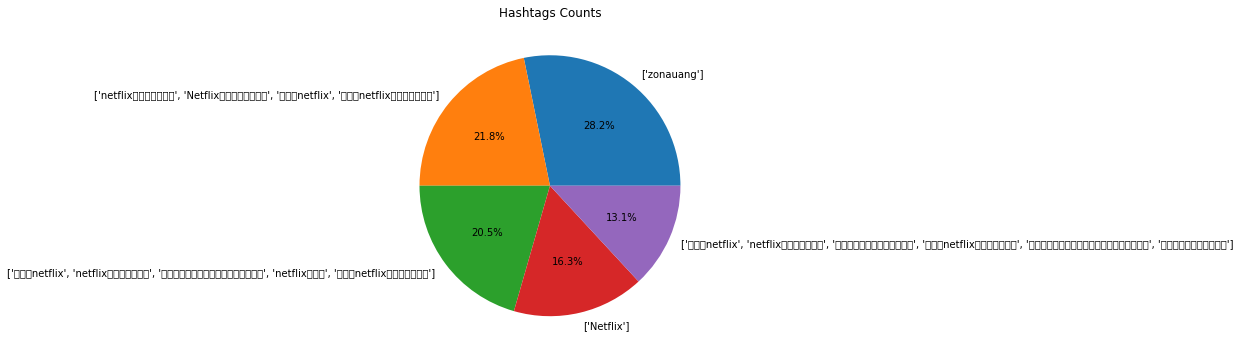

In [ ]:
import matplotlib.pyplot as plt

hashtags_counts = df2['hashtags'].value_counts().head(5)
plt.figure(figsize=(10,6))
plt.pie(hashtags_counts.values, labels=hashtags_counts.index, autopct='%1.1f%%')
plt.title('Hashtags Counts')
plt.show()

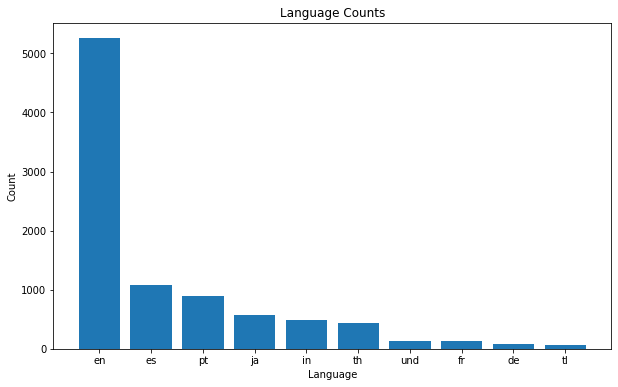

In [ ]:
#df2['lang'].value_counts()

import matplotlib.pyplot as plt

lang_counts = df2['lang'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(lang_counts.index, lang_counts.values)
plt.title('Language Counts')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [ ]:
df2['country'] = df2['place'].apply(lambda x: x['country'] if x else None)
df2['countryCode'] = df2['place'].apply(lambda x: x['countryCode'] if x else None)

In [ ]:
top_location_of_tweet = df2['country'].value_counts()
top_location_of_tweet.head(20)

United States                  74
Brazil                         26
Mexico                          5
Argentina                       5
Canada                          5
Japan                           4
Colombia                        4
Indonesia                       3
Spain                           2
Nigeria                         2
France                          2
Guatemala                       2
Chile                           2
United Kingdom                  2
Germany                         1
Turkey                          1
Republic of Korea               1
Republic of the Philippines     1
Costa Rica                      1
Malaysia                        1
Name: country, dtype: int64

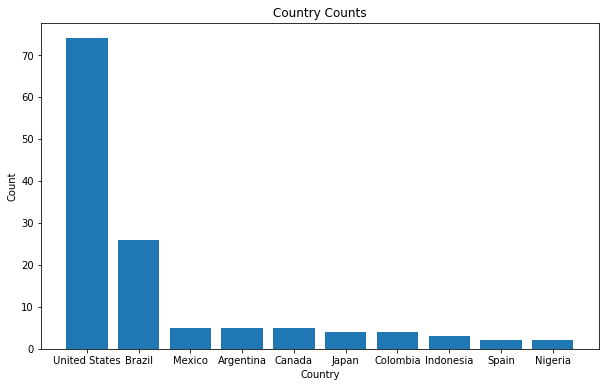

In [ ]:

import matplotlib.pyplot as plt

country_counts = df2['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values)
plt.title('Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [ ]:
df2['date_column'] = df2['date'].dt.date

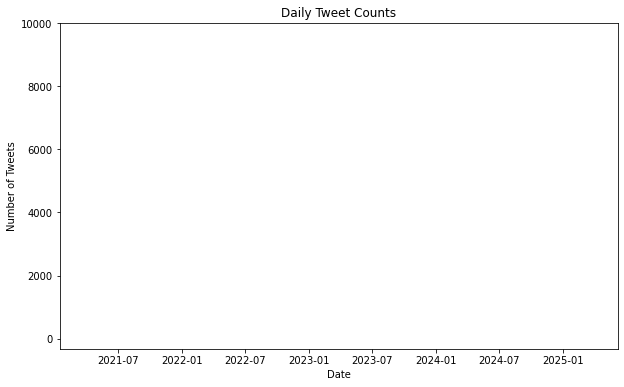

In [ ]:
#Number of Tweets per day

# group the data by day and count the number of tweets per day
daily_counts = df2.groupby(df2['date'].dt.date).count()

# create a line chart of the daily tweet counts
plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()





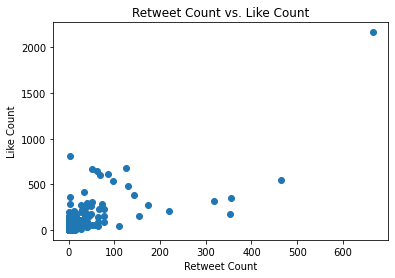

In [ ]:
# Create a scatter plot of retweet count vs. like count
plt.scatter(df2['retweetCount'], df2['likeCount'])
plt.title('Retweet Count vs. Like Count')
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.show()

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from textblob import TextBlob

# Define a function to perform sentiment analysis on a tweet using TextBlob
def analyze_sentiment(tweet):
    # Create a TextBlob object for the tweet
    blob = TextBlob(tweet)
    
    # Use TextBlob to calculate the sentiment polarity of the tweet
    polarity = blob.sentiment.polarity
    
    # Return the sentiment polarity
    return polarity


# Apply the sentiment analysis function to each tweet in the DataFrame
df2['sentiment'] = df2['processed_text'].apply(analyze_sentiment)

# Print the resulting DataFrame
print(df2.head())



                       date  \
0 2023-03-28 07:04:52+00:00   
1 2023-03-28 07:04:48+00:00   
2 2023-03-28 07:04:46+00:00   
3 2023-03-28 07:04:46+00:00   
4 2023-03-28 07:04:44+00:00   

                                          rawContent  \
0  READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...   
1  it has to be some sort of ip tracking because ...   
2  @Jiminssshiii_ Moi aussi, j’ai commencé au moi...   
3  Por cierto, me quedan días con Netflix operati...   
4          jual netflix wetv https://t.co/yUhw12OLWF   

                                     renderedContent  \
0  READY\n\nNETFLIX SHARING\n38k/bln\n13k/minggu\...   
1  it has to be some sort of ip tracking because ...   
2  @Jiminssshiii_ Moi aussi, j’ai commencé au moi...   
3  Por cierto, me quedan días con Netflix operati...   
4          jual netflix wetv https://t.co/yUhw12OLWF   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  

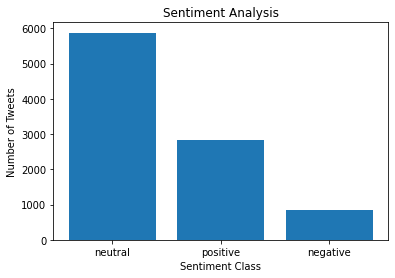

In [ ]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'S
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the classify_sentiment function to each sentiment polarity value in the DataFrame
df2['sentiment_type'] = df2['sentiment'].apply(classify_sentiment)


sentiment_counts = df2['sentiment_type'].value_counts()

# Create a bar plot of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add a title and labels for the x and y axes
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()

**Create Word Cloud**

In [ ]:
very_positive_tweets = df2[df2['sentiment'] > 0.3]

# display only the tweet and sentiment score columns

In [ ]:
very_positive_tweets.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text,country,countryCode,date_column,sentiment,sentiment_type
6,2023-03-28 07:04:39+00:00,Me &amp; my baby up eating snacks and watching...,Me &amp; my baby up eating snacks and watching...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,1.0,me and; my baby up eating snacks and watching ...,None,None,2023-03-28,0.600,positive
20,2023-03-28 07:04:09+00:00,@Handrev @elonmusk They have already dropped t...,@Handrev @elonmusk They have already dropped t...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,NaN,they have already dropped the price once. i d...,None,None,2023-03-28,0.375,positive
55,2023-03-28 07:03:05+00:00,One of the best actor in SK rn nd one of the g...,One of the best actor in SK rn nd one of the g...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[YooAhIn, Netflix]",7.0,one of the best actor in sk rn nd one of the g...,None,None,2023-03-28,0.600,positive
66,2023-03-28 07:02:24+00:00,@iainlee The Korean version of designated surv...,@iainlee The Korean version of designated surv...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,3.0,the korean version of designated survivor is ...,None,None,2023-03-28,0.910,positive
76,2023-03-28 07:02:03+00:00,@Joel_Dahmen @GenoBonnalie @netflix Enjoyed th...,@Joel_Dahmen @GenoBonnalie @netflix Enjoyed th...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[theopenchampionship],6.0,enjoyed the episode .are you coming to play i...,None,None,2023-03-28,0.500,positive


In [ ]:
very_negative_tweets = df2[df2['sentiment'] < 0]

In [ ]:
very_negative_tweets.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,processed_text,country,countryCode,date_column,sentiment,sentiment_type
14,2023-03-28 07:04:24+00:00,@LESTATDELAC Tell this dude/ gal/whoever first...,@LESTATDELAC Tell this dude/ gal/whoever first...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,NaN,"tell this dude/ gal/whoever firstly, it's not...",None,None,2023-03-28,-0.108333,negative
47,2023-03-28 07:03:26+00:00,Fuck Netflix !! 😂 Sport vie,Fuck Netflix !! 😂 Sport vie,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,7.0,fuck netflix !! 😂 sport vie,None,None,2023-03-28,-0.625000,negative
59,2023-03-28 07:02:52+00:00,@scalydinosau33 @KevinThobias @stillgray You’r...,@scalydinosau33 @KevinThobias @stillgray You’r...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,7.0,you’re comparing a life-altering gender trans...,None,None,2023-03-28,-0.166667,negative
63,2023-03-28 07:02:34+00:00,@Sunnysi63443541 @kamaalrkhan Tumhe nhi pta ne...,@Sunnysi63443541 @kamaalrkhan Tumhe nhi pta ne...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,None,6.0,tumhe nhi pta news fake hoti? deal secret hot...,None,None,2023-03-28,-0.266667,negative
151,2023-03-28 06:58:51+00:00,@AkamKevin @TraceyR64968698 That headline soun...,@AkamKevin @TraceyR64968698 That headline soun...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,en,None,None,3.0,that headline sounds like some perverse futur...,None,None,2023-03-28,-0.400000,negative


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

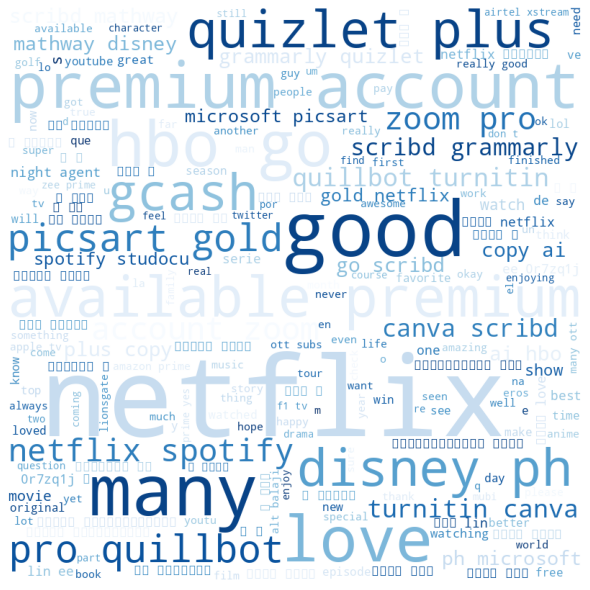

In [ ]:
# concatenate all the very positive tweets into a single string
all_tweets = ' '.join(very_positive_tweets['processed_text'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
all_words = nltk.word_tokenize(all_tweets.lower())
all_words = [word for word in all_words if word not in stopwords.words('english')]
all_words = [word for word in all_words if word not in string.punctuation]

# count the frequency of each word using a dictionary
word_freq = Counter(all_words)

# sort the words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# display the top 20 words with their frequencies
top_words = sorted_words[:20]
for word, freq in top_words:
    print(f'{word}: {freq}')

netflix: 988
โอมม: 440
🌻scribd: 350
’: 327
good: 303
love: 283
many: 227
premium: 226
available: 204
plus: 203
ph: 202
account: 200
go: 199
pro: 184
gcash: 182
gold: 179
ai: 178
365: 177
ูก: 176
🌻zoom: 175


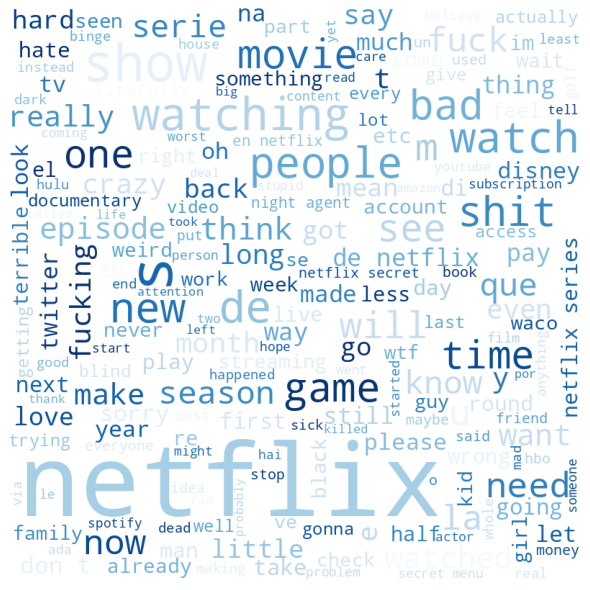

In [ ]:
# concatenate all the very positive tweets into a single string
all_tweets=" "
all_tweets = ' '.join(very_negative_tweets['processed_text'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Sentiment **Analysis**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
df3 = df2[['processed_text', 'sentiment_type']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['processed_text'], df3['sentiment_type'], random_state=0)


In [ ]:
# Convert text into numerical vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7595307917888563
